# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** Bryan Sean Abner Manullang
- **Email:** bryansean425@gmail.com
- **ID Dicoding:** L4PQE63GOPO1

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 (Bagaimana tren jumlah peminjaman sepeda yang terdaftar (registered rentals) secara bulanan dalam dua tahun terakhir?)
- Pertanyaan 2 (Pada jam berapa jumlah peminjaman sepeda yang terdaftar (registered rentals) mencapai puncaknya dalam satu hari?)

## Import Semua Packages/Library yang Digunakan

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from datetime import datetime

## Data Wrangling

### Gathering Data

In [3]:
day_df = pd.read_csv("data/day.csv", parse_dates=["dteday"])
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
hour_df = pd.read_csv("data/hour.csv", parse_dates=["dteday"])
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
Pada day_df terdapat 16 kolom, sedangkan pada hour_df terdapat 17 kolom.

### Assessing Data

In [5]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [6]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [7]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [8]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [9]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [29]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [10]:
day_df.describe()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [11]:
hour_df.describe()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


In [12]:
missing_values_day = day_df.isnull().sum()
missing_values_hour = hour_df.isnull().sum()

summary_day = day_df.describe()
summary_hour = hour_df.describe()

missing_values_day, missing_values_hour, summary_day, summary_hour

(instant       0
 dteday        0
 season        0
 yr            0
 mnth          0
 holiday       0
 weekday       0
 workingday    0
 weathersit    0
 temp          0
 atemp         0
 hum           0
 windspeed     0
 casual        0
 registered    0
 cnt           0
 dtype: int64,
 instant       0
 dteday        0
 season        0
 yr            0
 mnth          0
 hr            0
 holiday       0
 weekday       0
 workingday    0
 weathersit    0
 temp          0
 atemp         0
 hum           0
 windspeed     0
 casual        0
 registered    0
 cnt           0
 dtype: int64,
           instant               dteday      season          yr        mnth  \
 count  731.000000                  731  731.000000  731.000000  731.000000   
 mean   366.000000  2012-01-01 00:00:00    2.496580    0.500684    6.519836   
 min      1.000000  2011-01-01 00:00:00    1.000000    0.000000    1.000000   
 25%    183.500000  2011-07-02 12:00:00    2.000000    0.000000    4.000000   
 50%    366.00

**Insight:**
- Pada dataset day.csv memiliki 731 entri, sedangkan hour.csv memiliki 17.379 entri. 
- Dapat dilihat bahwa pada kedua dataframe tersebut tidak memiliki dataframe yang hilang, tetapi memiliki tipe data yang salah, yaitu pada 'dteday' yang dimana data tersebut memiliki tipe data object yang seharusnya tipe datanya adalah datetime. 
- Kedua Dataframe tersebut juga tidak memiliki nilai Null.

### Cleaning Data

Memperbaiki tipe data 

In [13]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

In [14]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [15]:
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

In [16]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

## Exploratory Data Analysis (EDA)

### Explore ...

In [17]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


Dapat dilihat pada tabel diatas bahwa data pendaftaran sepeda sejak 2011 hingga 2012 terdapat jumlah paling sedikit dalam satu hari adalah 20 orang dan jumlah pendaftar yang paling banyak dalam satu hari adalah 6946 orang. 

In [18]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


Dapat dilihat pada tabel diatas bahwa data pendaftaran sepeda sejak 2011 hingga 2012 terdapat jumlah paling sedikit dalam satu jam adalah 0 orang dan jumlah pendaftar yang paling banyak dalam satu hari adalah 886 orang. 

In [19]:
day_df.groupby(by="season").agg({
    "dteday": "nunique",
    "registered": ["max", "min", "mean", "std"]
})

dteday registered                               
       nunique        max  min         mean          std
season                                                  
1          181       5315  416  2269.204420  1200.269751
2          184       6456  674  3886.233696  1353.375628
3          188       6917  889  4441.691489  1304.626949
4          178       6946   20  3999.050562  1444.782557

Berdasarkan output tersebut dapat disimpulkan bahwa pada tahun 2011 hingga 2012, pendaftaran sepeda tertinggi ada pada Musim Gugur dan terendah pada Musim Semi

In [20]:
hour_df.groupby(by="season").agg({
    "dteday": "nunique",
    "registered": ["max", "min", "mean", "std"]
})

dteday registered                            
       nunique        max min        mean         std
season                                               
1          181        681   0   96.823668  104.347605
2          184        782   0  162.183488  152.751493
3          188        886   0  185.729093  166.430156
4          178        876   0  168.202032  157.559340

Berdasarkan output tersebut dapat disimpulkan bahwa pada tahun 2011 hingga 2012, dilihat dari rata-rata pendaftaran sepeda tertinggi ada pada Musim Gugur dan terendah pada Musim Semi.

In [21]:
hour_df.groupby(by="hr").agg({
    "dteday": "nunique",
    "registered": ["max", "min", "mean", "std"]
})

dteday registered                            
   nunique        max min        mean         std
hr                                               
0      726        234   0   43.739669   34.019585
1      724        139   0   26.871547   27.344153
2      715        104   0   18.097902   21.303895
3      697         61   0    9.011478    9.743691
4      697         22   0    5.098996    3.134479
5      717         64   0   18.478382   12.674751
6      725        203   0   71.882759   53.535307
7      727        572   1  201.009629  157.120459
8      727        808   4  337.331499  229.698404
9      727        399   6  188.418157   84.633490
10     727        351   8  127.191197   66.281668
11     727        446   5  148.602476   79.090301
12     728        526   3  185.021978   89.240873
13     729        491   9  181.352538   87.424775
14     729        502  12  165.381344   84.055205
15     729        456   4  176.327846   84.488219
16     730        481   8  238.238356  103.765726
17     730        885  14  387.178082  211.676303
18     728        886  20  364.390110  203.599896
19     728        662  11  262.752747  138.708622
20     728        461   8  189.796703  100.293791
21     728        362   6  144.059066   73.149848
22     728        327   5  109.082418   55.252765
23     728        220   2   72.631868   40.446431

**Insight:**

Waktu yang memiliki rata rata peminjaman sepeda tertinggi adalah pada pukul 5 malam, 6 malam, dan 8 malam. Sedangkan waktu dengan rata rata peminjaman sepeda terendah adalah pada pukul 4 pagi, 3 pagi. dan 5 pagi. Hal ini menunjukkan peminjam sepeda meningkat di sore hari menjelang malam hari dan menurun pada pagi hari.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

In [22]:
data_df = day_df.copy() 
data_year = {0: '2011', 1 : '2012'}
data_month = {1:'January', 2:'February', 3:'March', 4 :'April', 5 :'May', 6: "June", 7: "July", 8: "August", 9: "September", 10: "October", 11: "November", 12: "December"}

data_df['yr'] = data_df['yr'].map(data_year)
data_df['mnth'] = data_df['mnth'].map(data_month)
data_df['weekday'] = data_df['dteday'].dt.day_name()
data_df = data_df[['dteday', 'yr', 'mnth', 'weekday', 'registered']]

print(data_df)

        dteday    yr      mnth    weekday  registered
0   2011-01-01  2011   January   Saturday         654
1   2011-01-02  2011   January     Sunday         670
2   2011-01-03  2011   January     Monday        1229
3   2011-01-04  2011   January    Tuesday        1454
4   2011-01-05  2011   January  Wednesday        1518
..         ...   ...       ...        ...         ...
726 2012-12-27  2012  December   Thursday        1867
727 2012-12-28  2012  December     Friday        2451
728 2012-12-29  2012  December   Saturday        1182
729 2012-12-30  2012  December     Sunday        1432
730 2012-12-31  2012  December     Monday        2290

[731 rows x 5 columns]


In [23]:
monthly_rentals = data_df.groupby(['yr', 'mnth'])[('registered')].sum().reset_index()
monthly_rentals = monthly_rentals[['yr', 'mnth', 'registered']]
print(monthly_rentals)

      yr       mnth  registered
0   2011      April       72524
1   2011     August      107849
2   2011   December       78875
3   2011   February       41973
4   2011    January       35116
5   2011       July      104889
6   2011       June      112900
7   2011      March       51219
8   2011        May      104771
9   2011   November       86573
10  2011    October       98289
11  2011  September      100873
12  2012      April      135768
13  2012     August      171306
14  2012   December      110468
15  2012   February       94416
16  2012    January       87775
17  2012       July      161902
18  2012       June      159536
19  2012      March      133257
20  2012        May      151630
21  2012   November      131655
22  2012    October      164303
23  2012  September      174795


C:\Users\Asus\AppData\Local\Temp\ipykernel_18680\3401996706.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  monthly_rentals['date'] = pd.to_datetime(monthly_rentals['date'])


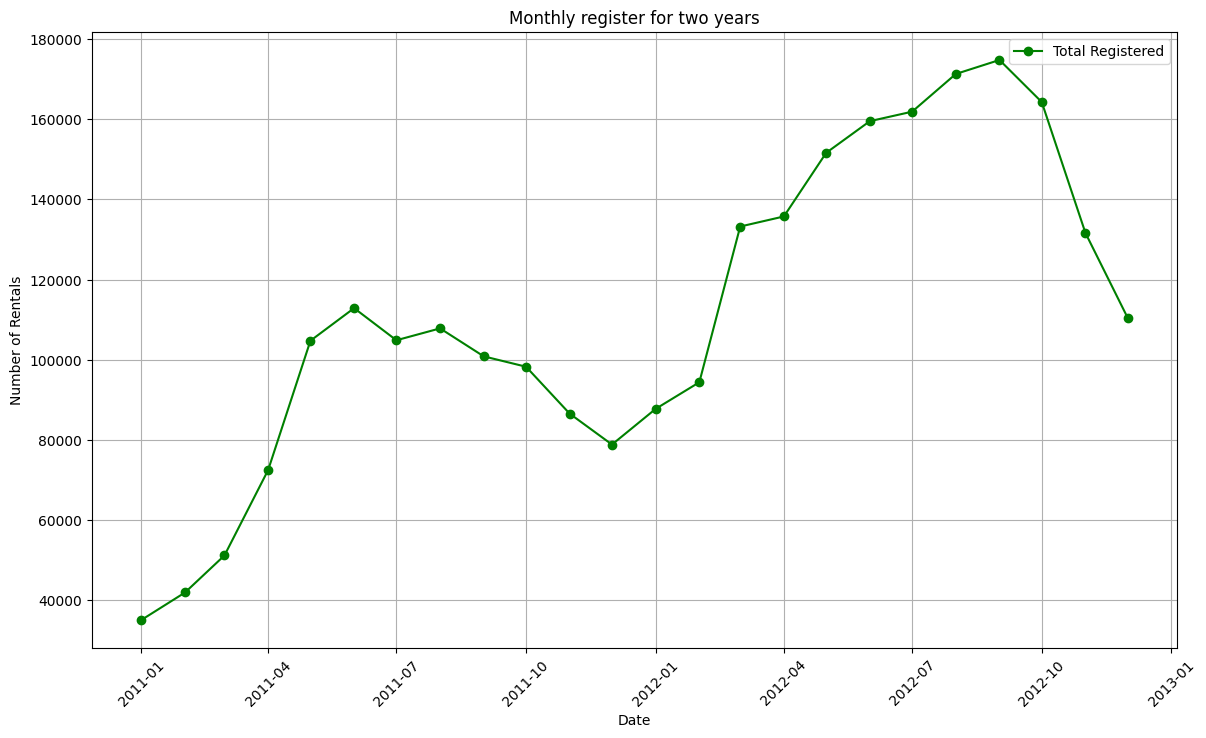

In [24]:
monthly_rentals['date'] = monthly_rentals['yr'] + '-' + monthly_rentals['mnth']
monthly_rentals['date'] = pd.to_datetime(monthly_rentals['date'])
monthly_rentals = monthly_rentals.sort_values('date')

plt.figure(figsize=(14,8))
plt.plot(monthly_rentals['date'], monthly_rentals['registered'], marker = 'o', label = 'Total Registered', color = 'green')
plt.title('Monthly register for two years')
plt.xlabel('Date')
plt.ylabel('Number of Rentals')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)

plt.show()

**Insight:**

Pada grafik diatas menunjukkan bahwa jumlah pendaftar pada 6 bulan pertama di tahun 2011 terdapat kenaikan yang cukup baik dan selanjutnya 6 bulan setelahnya di tahun 2011 mengalami penurunan yang sangat drastis. Kemudian mengalami penaikan yang sangat bagus pada 9 bulan pertama di tahun 2012 dan selanjutnya mengalami penurunan hingga bulan terakhir di tahun 2012. 

### Pertanyaan 2:

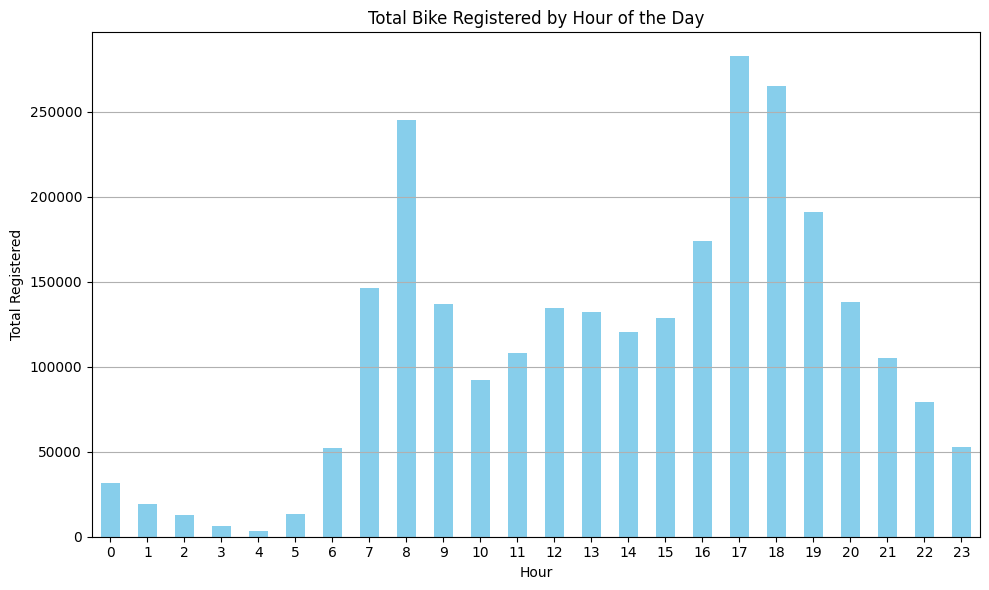

In [25]:
# Waktu
data1_df = hour_df.copy()
hourly_counts = data1_df.groupby('hr')['registered'].sum()

plt.figure(figsize=(10, 6))
hourly_counts.plot(kind='bar', color='skyblue')
plt.title('Total Bike Registered by Hour of the Day')
plt.xlabel('Hour')
plt.ylabel('Total Registered')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

**Insight:**

Pada grafik batang diatas menunjukkan bahwa total pendaftaran sepeda pada pukul 5 sore dan 6 sore yang keduanya memiliki lebih dari 250 ribu pendaftar sejak tahun 2011 dan 2012. 

## Analisis Lanjutan (Opsional)

In [ ]:
# Menset tanggal terbaru dalam dataset
latest_date = day_df['dteday'].max()

# Menghitung RFM berdasarkan hari
rfm_df = day_df.groupby('dteday').agg(
    Frequency=('registered', 'count'),  # Jumlah hari dengan transaksi
    Monetary=('registered', 'sum')  # Total peminjaman yang terdaftar
).reset_index()

# Menghitung Recency sebagai selisih hari dari tanggal terakhir
rfm_df['Recency'] = (latest_date - rfm_df['dteday']).dt.days

rfm_df.head()

,dteday,Frequency,Monetary,Recency
0,2011-01-01,1,654,730
1,2011-01-02,1,670,729
2,2011-01-03,1,1229,728
3,2011-01-04,1,1454,727
4,2011-01-05,1,1518,726


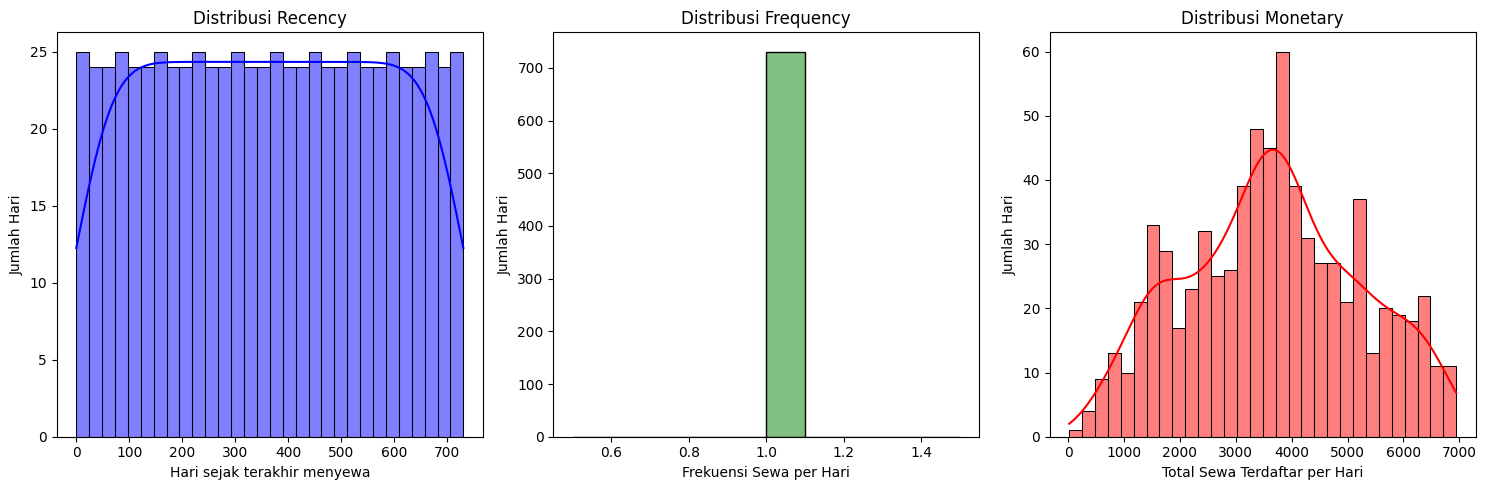

In [ ]:
# Menampilkan distribusi Recency, Frequency, dan Monetary
plt.figure(figsize=(15, 5))

# Distribusi Recency
plt.subplot(1, 3, 1)
sns.histplot(rfm_df['Recency'], bins=30, kde=True, color='blue')
plt.title('Distribusi Recency')
plt.xlabel('Hari sejak terakhir menyewa')
plt.ylabel('Jumlah Hari')

# Distribusi Frequency
plt.subplot(1, 3, 2)
sns.histplot(rfm_df['Frequency'], bins=10, kde=True, color='green')
plt.title('Distribusi Frequency')
plt.xlabel('Frekuensi Sewa per Hari')
plt.ylabel('Jumlah Hari')

# Distribusi Monetary
plt.subplot(1, 3, 3)
sns.histplot(rfm_df['Monetary'], bins=30, kde=True, color='red')
plt.title('Distribusi Monetary')
plt.xlabel('Total Sewa Terdaftar per Hari')
plt.ylabel('Jumlah Hari')

plt.tight_layout()
plt.show()

**Insight:**

- Pada Distribusi Recencynya  (Hari sejak terakhir menyewa sepeda) yang dimana pada grafik menunjukkan bahwa pelanggan datang dan pergi secara konsisten dan cukup stabil. 

- Pada Distribusi Frequency(Seberapa sering pengguna menyewa sepeda dalam 1 hari) dapat dilihat menunjukkan hanya nilai 1 yang berarti hanya tercatat satu transaksi penyewaan per pengguna dalam data yang tersedia. 

- Pada Distribusi Monetary(Total jumlah penyewaan per hari) dapat dilihat bahwa pada distrbusi ini mirip seperti distribusi normal yang menunjukkan bahwa sebagian besar hari memiliki jumlah peminjaman yang cukup stabil disekitar angka 3000 - 5000 penyewaan per hari.

## Conclusion

Berdasarkan proses analisis data yang dilakukan dengan menggunakan dataset Bike Sharing ini dengan menjawab beberapa pertanyaan yang sudah disebutkan diawal, maka dapat disimpulkan sebagai berikut. 
- Pertanyaan 1 : 
Dari hasil yang di peroleh menunjukkan bahwa jumlah pendaftar pada 6 bulan pertama di tahun 2011 terdapat kenaikan yang cukup baik dan selanjutnya 6 bulan setelahnya di tahun 2011 mengalami penurunan yang sangat drastis. Kemudian mengalami penaikan yang sangat bagus pada 9 bulan pertama di tahun 2012 dan selanjutnya mengalami penurunan hingga bulan terakhir di tahun 2012. 

- Pertanyaan 2 : 
Pada grafik batang yang diperoleh menunjukkan bahwa total pendaftaran sepeda pada pukul 5 sore dan 6 sore yang keduanya memiliki lebih dari 250 ribu pendaftar sejak tahun 2011 dan 2012. 


In [30]:
data_df.to_csv("main_data.csv", index=False)
data1_df.to_csv("main_data1.csv", index=False)

Menyimpan dataframe 'data_df' dalam bentuk csv untuk menjadi data hari dan menyimpan dataframe 'data1_df' dalam bentuk csv untuk menjadi data jam pada pembuatan dashboard.